# Predicting Flight Delays

Flight! A truly amazing technological achievement for humanity and often a truly nightmarish experience for any given human.

But what if we could predict whether or not our flights will be delayed?

For this analysis, we attempted to predict flight delays using a national dataset of flights in 2019. 

In [1]:
# set up our environment and read in data
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn import svm;
from sklearn.linear_model import LinearRegression;
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

df_2019 = pd.read_csv('~/Downloads/Jan_2019_ontime.csv')


# Exploratory Analysis

In [2]:
df_2019.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
count,583985.000000,583985.000000,583985.000000,583985.000000,583985.000000,5.839850e+05,583985.000000,5.839850e+05,567633.000000,567630.000000,566924.000000,565963.000000,583985.000000,583985.000000,583985.000000,0.0
mean,15.960088,3.835626,19983.213168,2537.869334,12659.701982,1.265974e+06,12659.470015,1.265951e+06,1331.957814,0.174281,1484.315921,0.185917,0.028641,0.002219,797.742767,NaN
std,8.987942,1.921899,377.724638,1821.736145,1519.405493,1.519403e+05,1519.336466,1.519334e+05,495.404020,0.379351,523.162855,0.389040,0.166796,0.047056,589.999261,NaN
min,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013505e+06,10135.000000,1.013505e+06,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,31.000000,NaN
25%,8.000000,2.000000,19790.000000,979.000000,11292.000000,1.129202e+06,11292.000000,1.129202e+06,921.000000,0.000000,1104.000000,0.000000,0.000000,0.000000,363.000000,NaN
50%,16.000000,4.000000,19977.000000,2114.000000,12889.000000,1.288903e+06,12889.000000,1.288903e+06,1328.000000,0.000000,1517.000000,0.000000,0.000000,0.000000,640.000000,NaN
75%,24.000000,5.000000,20368.000000,3902.000000,13931.000000,1.393102e+06,13931.000000,1.393102e+06,1738.000000,0.000000,1919.000000,0.000000,0.000000,0.000000,1037.000000,NaN
max,31.000000,7.000000,20452.000000,7439.000000,16218.000000,1.621802e+06,16218.000000,1.621802e+06,2400.000000,1.000000,2400.000000,1.000000,1.000000,1.000000,4983.000000,NaN


In [3]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583985 entries, 0 to 583984
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           583985 non-null  int64  
 1   DAY_OF_WEEK            583985 non-null  int64  
 2   OP_UNIQUE_CARRIER      583985 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  583985 non-null  int64  
 4   OP_CARRIER             583985 non-null  object 
 5   TAIL_NUM               581442 non-null  object 
 6   OP_CARRIER_FL_NUM      583985 non-null  int64  
 7   ORIGIN_AIRPORT_ID      583985 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  583985 non-null  int64  
 9   ORIGIN                 583985 non-null  object 
 10  DEST_AIRPORT_ID        583985 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    583985 non-null  int64  
 12  DEST                   583985 non-null  object 
 13  DEP_TIME               567633 non-null  float64
 14  DEP_DEL15              567630 non-nu

In [4]:
df_2019.isna().sum()
# it looks like we have one completely empty column

DAY_OF_MONTH                  0
DAY_OF_WEEK                   0
OP_UNIQUE_CARRIER             0
OP_CARRIER_AIRLINE_ID         0
OP_CARRIER                    0
TAIL_NUM                   2543
OP_CARRIER_FL_NUM             0
ORIGIN_AIRPORT_ID             0
ORIGIN_AIRPORT_SEQ_ID         0
ORIGIN                        0
DEST_AIRPORT_ID               0
DEST_AIRPORT_SEQ_ID           0
DEST                          0
DEP_TIME                  16352
DEP_DEL15                 16355
DEP_TIME_BLK                  0
ARR_TIME                  17061
ARR_DEL15                 18022
CANCELLED                     0
DIVERTED                      0
DISTANCE                      0
Unnamed: 21              583985
dtype: int64

In [5]:
# let's drop the empty column
del df_2019["Unnamed: 21"]


In [6]:
# and now drop the other missings.
# with more time we might be a little more deliberate with this process
df_2019 = df_2019.dropna()

In [7]:
df_2019.isna().sum()
# looking good!

DAY_OF_MONTH             0
DAY_OF_WEEK              0
OP_UNIQUE_CARRIER        0
OP_CARRIER_AIRLINE_ID    0
OP_CARRIER               0
TAIL_NUM                 0
OP_CARRIER_FL_NUM        0
ORIGIN_AIRPORT_ID        0
ORIGIN_AIRPORT_SEQ_ID    0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST_AIRPORT_SEQ_ID      0
DEST                     0
DEP_TIME                 0
DEP_DEL15                0
DEP_TIME_BLK             0
ARR_TIME                 0
ARR_DEL15                0
CANCELLED                0
DIVERTED                 0
DISTANCE                 0
dtype: int64

In [8]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565963 entries, 0 to 583984
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   DAY_OF_MONTH           565963 non-null  int64  
 1   DAY_OF_WEEK            565963 non-null  int64  
 2   OP_UNIQUE_CARRIER      565963 non-null  object 
 3   OP_CARRIER_AIRLINE_ID  565963 non-null  int64  
 4   OP_CARRIER             565963 non-null  object 
 5   TAIL_NUM               565963 non-null  object 
 6   OP_CARRIER_FL_NUM      565963 non-null  int64  
 7   ORIGIN_AIRPORT_ID      565963 non-null  int64  
 8   ORIGIN_AIRPORT_SEQ_ID  565963 non-null  int64  
 9   ORIGIN                 565963 non-null  object 
 10  DEST_AIRPORT_ID        565963 non-null  int64  
 11  DEST_AIRPORT_SEQ_ID    565963 non-null  int64  
 12  DEST                   565963 non-null  object 
 13  DEP_TIME               565963 non-null  float64
 14  DEP_DEL15              565963 non-nu

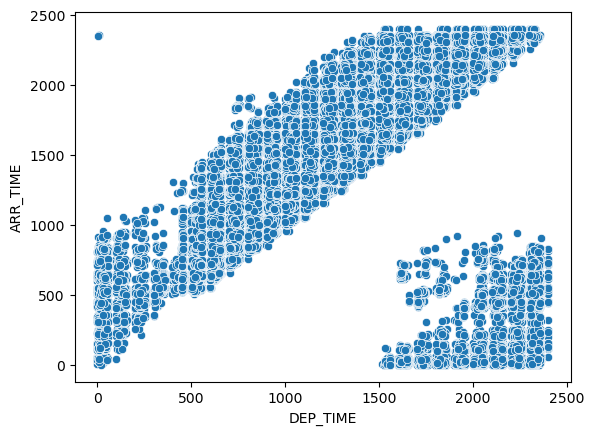

In [9]:
# Visual EDA

sns.scatterplot(data=df_2019, x="DEP_TIME", y="ARR_TIME");

# who flew to Alaska?


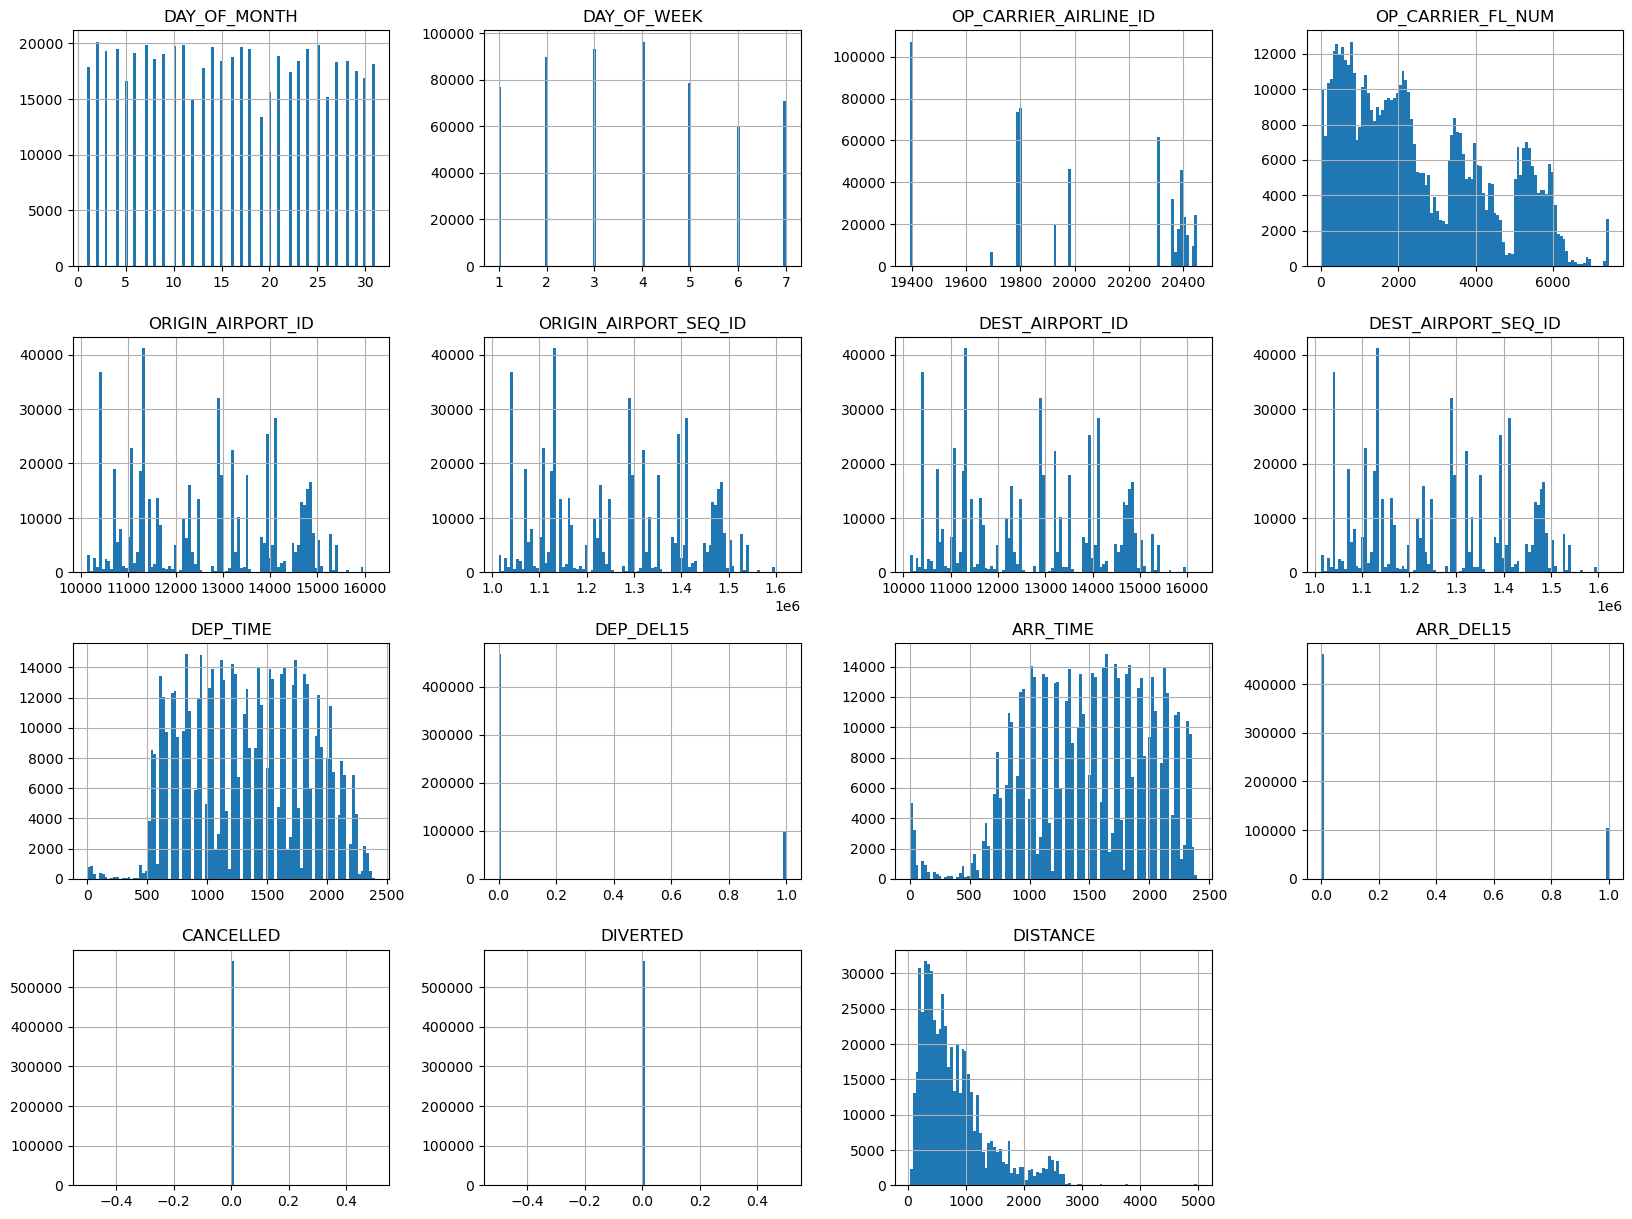

In [10]:
df_2019.hist(bins=100,figsize=(20,15))
plt.grid()
plt.show()

# Feature Selection, Engineering, and Modeling!

In [11]:
# There is a lot of excess info that we don't have time to use right now

df_2019 = df_2019.drop(['OP_CARRIER_FL_NUM', 'OP_UNIQUE_CARRIER','OP_CARRIER_AIRLINE_ID','TAIL_NUM', 'ORIGIN_AIRPORT_ID','ORIGIN_AIRPORT_SEQ_ID','DEST_AIRPORT_ID','DEST_AIRPORT_SEQ_ID'], axis=1)


In [12]:
df_2019.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
count,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,565963.000000,565963.0,565963.0,565963.000000
mean,15.782154,3.838159,1331.830093,0.173695,1484.411454,0.185917,0.0,0.0,802.395135
std,8.960357,1.919589,495.390348,0.378847,522.973859,0.389040,0.0,0.0,592.326244
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,31.000000
25%,8.000000,2.000000,921.000000,0.000000,1104.000000,0.000000,0.0,0.0,366.000000
50%,16.000000,4.000000,1328.000000,0.000000,1517.000000,0.000000,0.0,0.0,642.000000
75%,24.000000,5.000000,1738.000000,0.000000,1919.000000,0.000000,0.0,0.0,1045.000000
max,31.000000,7.000000,2400.000000,1.000000,2400.000000,1.000000,0.0,0.0,4983.000000


In [13]:
df_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER,ORIGIN,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,1,2,9E,GNV,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0
1,1,2,9E,MSP,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0
2,1,2,9E,DTW,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0
3,1,2,9E,TLH,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0
4,1,2,9E,ATL,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0


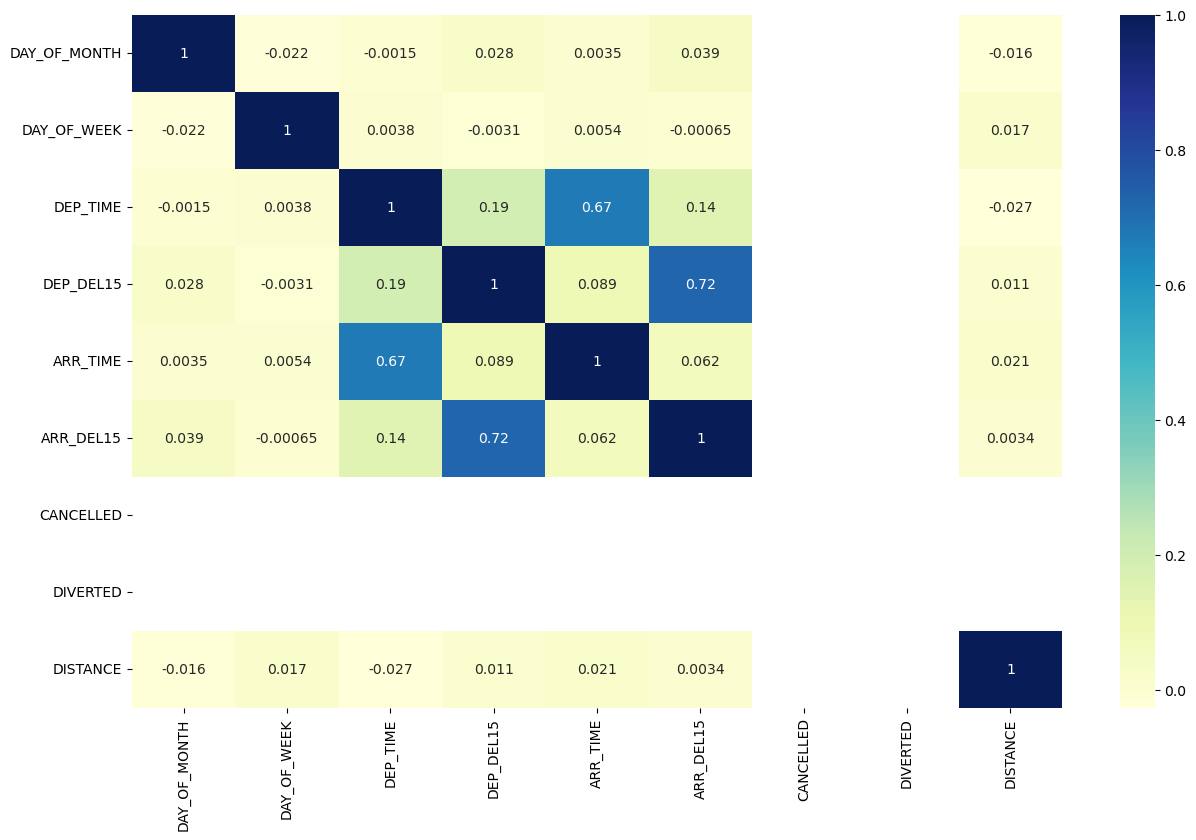

In [14]:
# let's look at relationships in our data frame 
fig,ax = plt.subplots(figsize=(15,9))
sns.heatmap(df_2019.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [15]:
# we still have a string variable
del df_2019['DEP_TIME_BLK']
del df_2019['OP_CARRIER']

In [16]:
# One hot encount a delayed column

df_2019['DELAYED'] = (df_2019['ARR_DEL15'].astype(bool) | df_2019['DEP_DEL15'].astype(bool)).astype(int)

# and drop the strings
del df_2019['ARR_DEL15']
del df_2019['DEP_DEL15']

In [17]:
# let's also label our string variables
from sklearn import preprocessing


def encode_flights(features):
    lb = preprocessing.LabelEncoder()
    for i in range(len(features)):
        df_2019[features[i]] = lb.fit_transform(df_2019[features[i]])
        
encode_flights(['ORIGIN', 'DEST'])

In [18]:
df_2019.head()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_TIME,ARR_TIME,CANCELLED,DIVERTED,DISTANCE,DELAYED
0,1,2,128,19,601.0,722.0,0.0,0.0,300.0,0
1,1,2,225,80,1359.0,1633.0,0.0,0.0,596.0,0
2,1,2,95,80,1215.0,1329.0,0.0,0.0,229.0,0
3,1,2,325,19,1521.0,1625.0,0.0,0.0,223.0,0
4,1,2,19,120,1847.0,1940.0,0.0,0.0,579.0,0


In [19]:
# after much trial and even more error, we decided to just drop these
del df_2019['ORIGIN']
del df_2019['DEST']

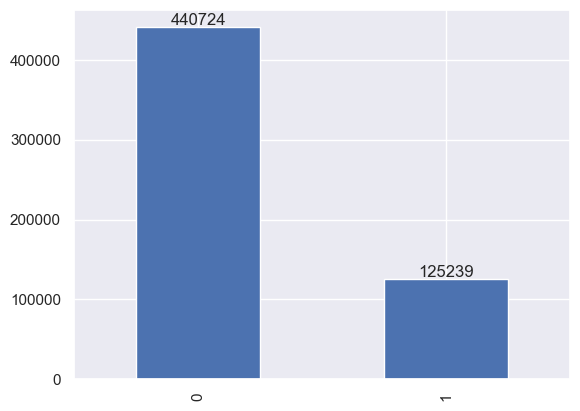

In [20]:
# check class imbalance
# we clearly have class imbalance
%matplotlib inline

sns.set_theme(style="darkgrid")

status_count_fig = df_2019['DELAYED'].value_counts().plot(kind='bar')
status_count_fig.bar_label(status_count_fig.containers[0], fmt='%d' );



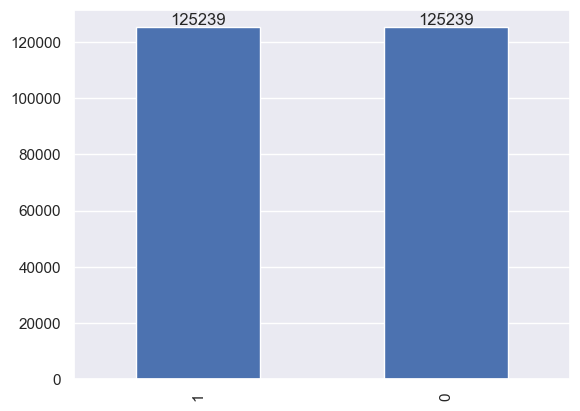

In [21]:
# let's rebalance with undersampling

from sklearn.utils import resample

delayed = df_2019[df_2019.DELAYED==1]
on_time = df_2019[df_2019.DELAYED==0]


# upsample minority
delayed_upsampled = resample(on_time
                            , replace=True # sample with replacement 
                            , n_samples=len(delayed) # match number in majority class
                          , random_state=12022022) # set seed

# combine majority and upsampled minority
upsampled = pd.concat([delayed, delayed_upsampled])

# check new class counts
status_count_fig = upsampled['DELAYED'].value_counts().plot(kind='bar')
status_count_fig.bar_label(status_count_fig.containers[0], fmt='%d' );



In [22]:
upsampled.head()

,DAY_OF_MONTH,DAY_OF_WEEK,DEP_TIME,ARR_TIME,CANCELLED,DIVERTED,DISTANCE,DELAYED
12,1,2,1552.0,1738.0,0.0,0.0,166.0,1
16,1,2,1353.0,1521.0,0.0,0.0,488.0,1
22,1,2,2216.0,16.0,0.0,0.0,399.0,1
43,1,2,1550.0,1859.0,0.0,0.0,579.0,1
48,1,2,2036.0,2233.0,0.0,0.0,74.0,1


In [23]:

X = upsampled.drop('DELAYED',axis=1)
y = upsampled['DELAYED']


In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=20221210)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix,classification_report


models = []

models.append(('LogisticRegression', LogisticRegression()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Extra Trees', ExtraTreesClassifier()))
models.append(('Bagging', BaggingClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))

In [26]:
for name, model in models:
    
    print(name)
    
    # Make predictions.
    
    trained_model = model.fit(x_train, y_train)
        
    predictions = trained_model.predict(x_test) 

    print(f"train score: {accuracy_score(y_train, trained_model.predict(x_train))}\n")
    
    print(f"test score: {accuracy_score(predictions,y_test)}\n\n")
    

LogisticRegression
train score: 0.5808954896148356

test score: 0.5816831683168316


RandomForest
train score: 0.9999750476589714

test score: 0.6695544554455446


Extra Trees
train score: 0.9999850285953829

test score: 0.657118332801022


Bagging
train score: 0.9826431515804813

test score: 0.6593340785691473


KNN
train score: 0.7916579333473066

test score: 0.6779583200255509




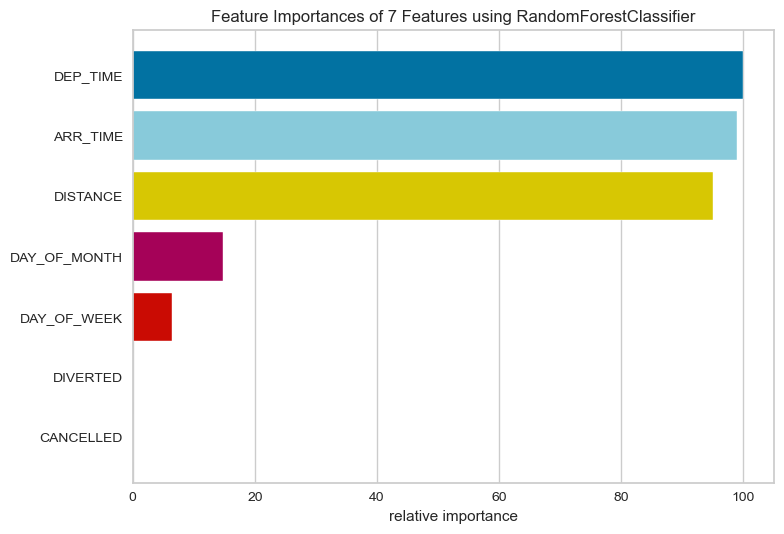

<AxesSubplot:title={'center':'Feature Importances of 7 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [30]:
from yellowbrick.model_selection import FeatureImportances


model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model)
viz.fit(X, y)
viz.show()